In [1]:
# the goal is create a deep learning regression model that predicts the likelihood that a student applying to graduate school
# will be accepted based on various application factors (such as test scores).
# https://www.kaggle.com/datasets/mohansacharya/graduate-admissions Kaggle dataset 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install tensorflow 

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score


In [2]:
# splitting and standardizing the dataset 

admissions = pd.read_csv('Admission_Predict.csv')
admissions.shape
# features: 
# Serial No.: Index of each row (1-500)
# GRE Score: GRE test score (out of 340)
# TOEFL Score: TOEFL test score (out of 120)
# University Rating: Evaluated university rating (out of 5)
# SOP: Statement of Purpose Strength (out of 5)
# LOR: Letter of Recommendation Strength (out of 5)
# CGPA: Undergraduate GPA (out of 10)
# Research: Has research experience (either 0 or 1)
# labels we'll try to predict:
# Chance of Admit: Applicant’s chance of being admitted (ranging from 0 to 1) 

features = admissions.iloc[:,0:-1]
labels = admissions.iloc[:,-1]
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, random_state = 1)

scaler = StandardScaler()
features_train = pd.DataFrame(scaler.fit_transform(features_train))
features_test = pd.DataFrame(scaler.transform(features_test))
features_train.head

<bound method NDFrame.head of             0         1         2         3         4         5         6  \
0   -0.896704 -1.397559 -1.694581 -0.920062 -0.381324 -0.491364 -1.210752   
1   -1.506504  1.515056  1.896584  1.677760  1.586799  1.169585  1.852553   
2    0.897848 -1.044515  0.753941 -0.054121 -0.381324  0.062286  0.085261   
3   -1.593618 -0.867992  0.264236 -0.054121  0.602737 -0.491364 -1.008776   
4   -0.922839  0.102879 -0.225468 -0.920062  0.602737  0.615935 -1.143427   
..        ...       ...       ...       ...       ...       ...       ...   
315  0.514545 -0.867992  0.427471  0.811820  0.602737  1.169585 -0.386016   
316 -1.079644  0.367663  0.590706  1.677760  1.586799  1.723235  1.431769   
317  1.742855  0.720707 -0.062233 -0.054121 -0.381324  0.062286  0.859503   
318  0.340317  0.808968  0.590706  1.677760  1.094768  0.615935  1.061479   
319 -1.384544 -1.485820 -0.388703 -1.786003 -2.349446 -1.598664 -1.345403   

            7  
0    0.921798  
1    0.921798

In [7]:
# creating neural network 
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


model = Sequential()
input = InputLayer(shape = (features.shape[1],))
model.add(input)
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1))
opt = Adam(learning_rate = 0.01)
model.compile(loss = 'mse', metrics = ['mae'], optimizer = opt)


In [9]:
# what's the best number of epochs? 
from tensorflow.keras.callbacks import EarlyStopping
learning_rate = 0.1
num_epochs = 500
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40)
history = model.fit(features_train, labels_train, epochs=num_epochs, batch_size=16, verbose=0, validation_split=0.2, callbacks=[stop])

Epoch 293: early stopping


Text(0, 0.5, 'MAE')

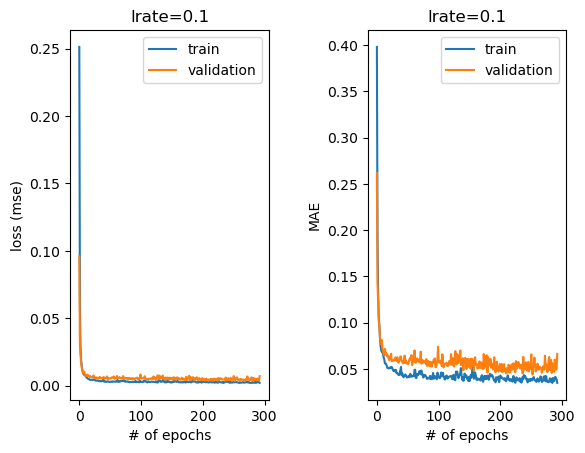

In [10]:

# visualizing 
fig, axs = plt.subplots(1, 2, gridspec_kw={'hspace': 1, 'wspace': 0.5}) 
(ax1, ax2) = axs
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='validation')
ax1.set_title('lrate=' + str(learning_rate))
ax1.legend(loc="upper right")
ax1.set_xlabel("# of epochs")
ax1.set_ylabel("loss (mse)")

ax2.plot(history.history['mae'], label='train')
ax2.plot(history.history['val_mae'], label='validation')
ax2.set_title('lrate=' + str(learning_rate))
ax2.legend(loc="upper right")
ax2.set_xlabel("# of epochs")
ax2.set_ylabel("MAE")

In [19]:
# training the model
model.fit(features_train, labels_train, epochs=293, batch_size=3, verbose=1, validation_split = 0.2)
val_mse, val_mae = model.evaluate(features_test, labels_test, verbose = 0)
print("MAE: ", val_mae)

Epoch 1/293
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0038 - mae: 0.0504 - val_loss: 0.0046 - val_mae: 0.0559
Epoch 2/293
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0044 - mae: 0.0495 - val_loss: 0.0042 - val_mae: 0.0499
Epoch 3/293
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0035 - mae: 0.0450 - val_loss: 0.0048 - val_mae: 0.0530
Epoch 4/293
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0037 - mae: 0.0467 - val_loss: 0.0031 - val_mae: 0.0417
Epoch 5/293
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0036 - mae: 0.0445 - val_loss: 0.0045 - val_mae: 0.0507
Epoch 6/293
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0035 - mae: 0.0451 - val_loss: 0.0032 - val_mae: 0.0424
Epoch 7/293
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0036 - mae: 0.0457 - val_loss: 0.0047 - val_mae: 0.0520
Epoch 8/293
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0036 - mae: 0.0472 - val_loss: 0.0042 - val_mae: 0.0494
Epoch 9/293
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.002

In [25]:
#  coefficient of determination
predicted_values = model.predict(features_test) 
print(r2_score(labels_test, predicted_values)) 


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
0.8018269044869569
